<a href="https://colab.research.google.com/github/pawanraje16/CVDLlab/blob/main/cvdlLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

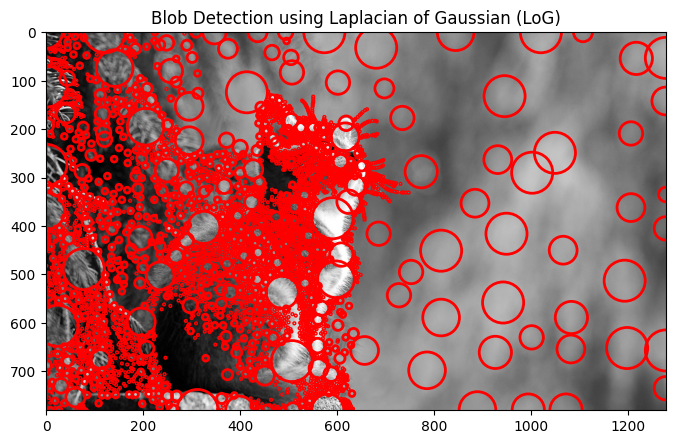

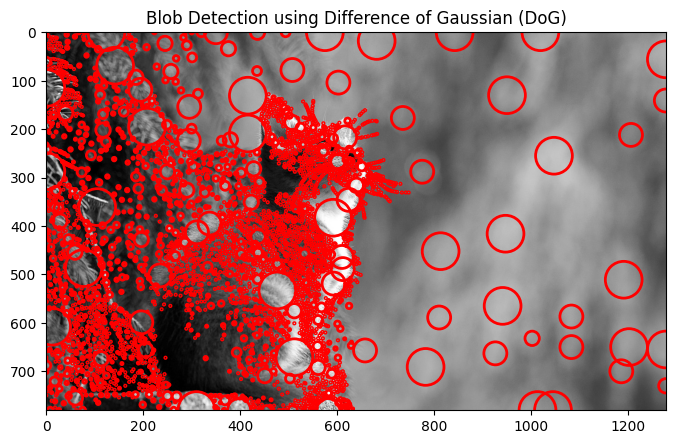

In [1]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog
import matplotlib.pyplot as plt

# Load the image
def load_image():
    img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
    return img

# Blob Detection using Laplacian of Gaussian (LoG)
def detect_blobs_log(image, max_sigma, threshold):
    blobs_log = blob_log(image, max_sigma=max_sigma, num_sigma=10, threshold=threshold)
    # Compute radii in the 3rd column
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log

# Blob Detection using Difference of Gaussian (DoG)
def detect_blobs_dog(image, max_sigma, threshold):
    blobs_dog = blob_dog(image, max_sigma=max_sigma, threshold=threshold)
    # Compute radii in the 3rd column
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
    return blobs_dog

# Plot results
def plot_blobs(image, blobs, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_title(title)
    plt.show()

# Main Function
def main():
    # Load image
    image = load_image()

    # Parameters
    max_sigma = 30
    threshold_log = 0.03  # Change this to see the effect
    threshold_dog = 0.03  # Change this to see the effect

    # Detect blobs
    blobs_log = detect_blobs_log(image, max_sigma=max_sigma, threshold=threshold_log)
    blobs_dog = detect_blobs_dog(image, max_sigma=max_sigma, threshold=threshold_dog)

    # Plot results
    plot_blobs(image, blobs_log, "Blob Detection using Laplacian of Gaussian (LoG)")
    plot_blobs(image, blobs_dog, "Blob Detection using Difference of Gaussian (DoG)")

if __name__ == "__main__":
    main()


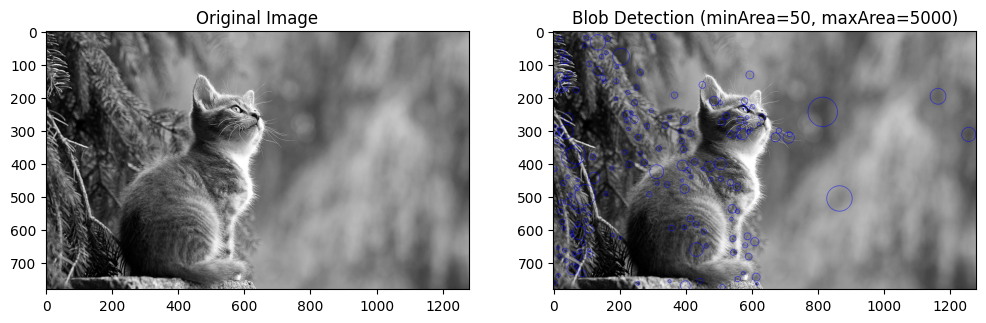

In [2]:
def create_blob_detector(min_area, max_area, min_threshold, max_threshold):
    params = cv2.SimpleBlobDetector_Params()

    # Set area filtering parameters
    params.filterByArea = True
    params.minArea = min_area  # Minimum area
    params.maxArea = max_area  # Maximum area

    # Set thresholding parameters
    params.minThreshold = min_threshold  # Minimum threshold
    params.maxThreshold = max_threshold  # Maximum threshold

    # Optional: Enable circularity, convexity, or inertia filtering if needed
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)
    return detector

# Detect blobs
def detect_blobs(image, detector):
    keypoints = detector.detect(image)
    return keypoints

# Draw blobs on the image
def draw_blobs(image, keypoints):
    # Draw detected blobs as red circles
    image_with_blobs = cv2.drawKeypoints(
        image, keypoints, np.zeros_like(image), (0, 0, 255),
        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    return image_with_blobs

# Plot the results
def plot_results(original, result, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(result, cmap='gray')
    ax[1].set_title(title)
    plt.show()

# Main function
def main():
    # Load grayscale image
    image = load_image()

    # Experiment with these parameters
    min_area = 50
    max_area = 5000
    min_threshold = 10
    max_threshold = 200

    # Create detector
    detector = create_blob_detector(min_area, max_area, min_threshold, max_threshold)

    # Detect blobs
    keypoints = detect_blobs(image, detector)

    # Draw blobs on the image
    result_image = draw_blobs(image, keypoints)

    # Plot the results
    plot_results(image, result_image, f"Blob Detection (minArea={min_area}, maxArea={max_area})")

if __name__ == "__main__":
    main()

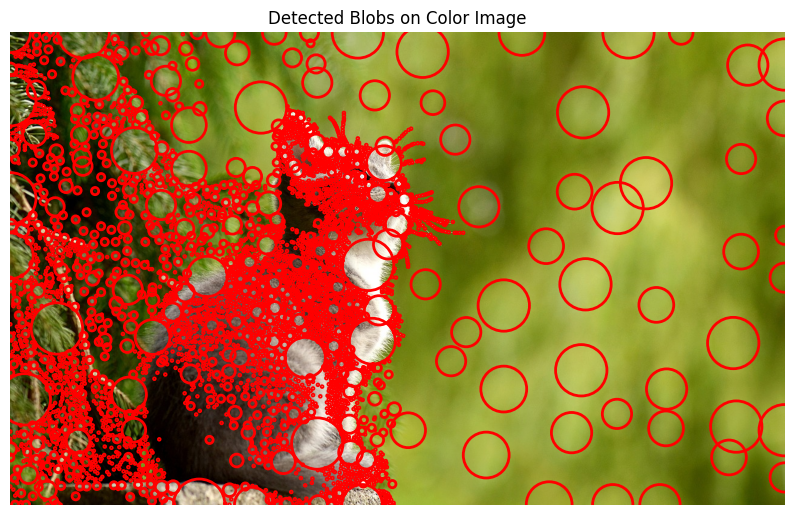

In [5]:
import cv2
import numpy as np
from skimage.feature import blob_log
import matplotlib.pyplot as plt

# Load a color image
def load_image():
    # Replace 'sample_image.jpg' with the path to your image
    image = cv2.imread('cat.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image

# Convert to grayscale
def convert_to_grayscale(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return grayscale

# Blob detection using Laplacian of Gaussian (LoG)
def detect_blobs(image, max_sigma, threshold):
    blobs = blob_log(image, max_sigma=max_sigma, num_sigma=10, threshold=threshold)
    # Compute radii in the 3rd column
    blobs[:, 2] = blobs[:, 2] * np.sqrt(2)
    return blobs

# Visualize blobs on the original image
def visualize_blobs(image, blobs, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)

    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)

    ax.set_title(title)
    plt.axis('off')
    plt.show()

# Main function
def main():
    # Load the color image
    color_image = load_image()

    # Convert to grayscale
    grayscale_image = convert_to_grayscale(color_image)

    # Blob detection parameters
    max_sigma = 30
    threshold = 0.03

    # Detect blobs
    blobs = detect_blobs(grayscale_image, max_sigma=max_sigma, threshold=threshold)

    # Visualize blobs on the original color image
    visualize_blobs(color_image, blobs, "Detected Blobs on Color Image")

if __name__ == "__main__":
    main()
